Now it's time to play with some data. You're going to work through the stages of model preparation we've covered in this lesson and write up each one. Keep a good record in a Jupyter notebook – we'll come back to your features in a future model-building assignment on Least Squares Regression.

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# Set the default plot aesthetics to be prettier.
sns.set_style("white")
# Import data
df = pd.read_csv('winequality_white.csv')
names = df.columns
print(names)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


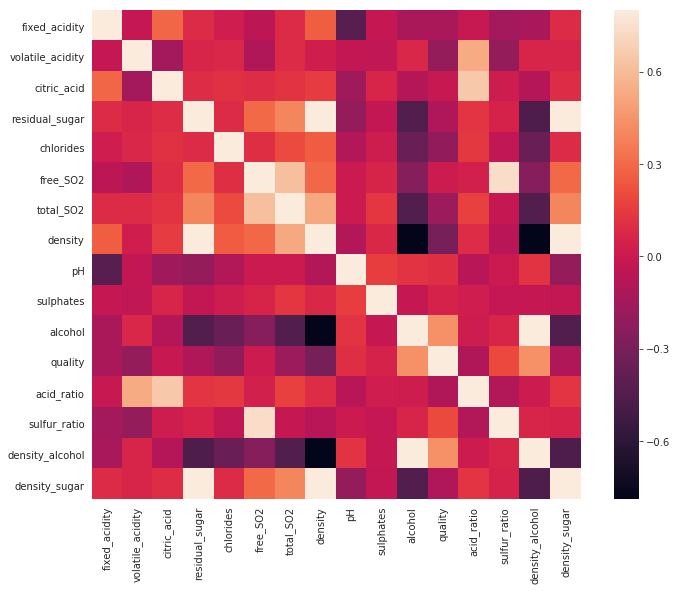

In [48]:
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_SO2', 'total_SO2', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

#Create new features
features = pd.get_dummies(df['quality'])
df['acid_ratio'] = df['volatile_acidity'] / df['fixed_acidity'] * df['citric_acid']
df['sulfur_ratio'] = df['free_SO2'] / df['total_SO2']
df['density_alcohol'] = df['alcohol'] / df['density']
df['density_sugar'] = df['residual_sugar'] / df['density']


corrmat = df.corr()

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [49]:

# We have some varibles that are related to each other such as
# 'fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide'
#Let's make some averages. Just in case some of the variables are on
# different scales than others (one ranges from 0 to 100, one ranges from 0 to
# 7, for example) we scale them before averaging by subtracting the average of
# each variable from all values in that variable, then dividing by the
# standard deviation.
means = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_SO2', 'total_SO2']].mean(axis=0)
stds = df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_SO2', 'total_SO2']].std(axis=0)
features['Normalized_Vars'] = ((df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_SO2', 'total_SO2']] - means) / stds).mean(axis=1)

# Check how well the composite correlates with each of the individual variables.
plotdf = df.loc[:, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'free_SO2', 'total_SO2']]
plotdf['Normalized_Vars'] = features['Normalized_Vars'] 
corrmat2 = plotdf.corr()
print(corrmat2)


                  fixed_acidity  volatile_acidity  citric_acid  free_SO2  \
fixed_acidity          1.000000         -0.022697     0.289181 -0.049396   
volatile_acidity      -0.022697          1.000000    -0.149472 -0.097012   
citric_acid            0.289181         -0.149472     1.000000  0.094077   
free_SO2              -0.049396         -0.097012     0.094077  1.000000   
total_SO2              0.091070          0.089261     0.121131  0.615501   
Normalized_Vars        0.495739          0.310777     0.513459  0.592378   

                  total_SO2  Normalized_Vars  
fixed_acidity      0.091070         0.495739  
volatile_acidity   0.089261         0.310777  
citric_acid        0.121131         0.513459  
free_SO2           0.615501         0.592378  
total_SO2          1.000000         0.726451  
Normalized_Vars    0.726451         1.000000  


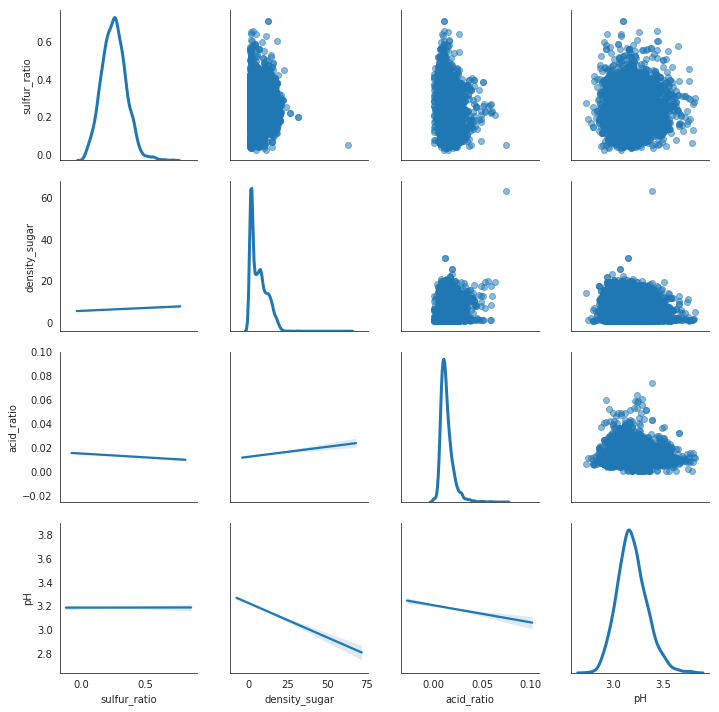

In [53]:

# Take a subset of the data to make plots clearer.
df_wine = df[['sulfur_ratio', 'density_sugar','acid_ratio',
        'pH']]
    

# Because the variables can only take integer values between 0 and 10, points
# on the scatterplot will hide one another. To better see all the points, we
# create a dataframe of random noise (or "jitter") and add it only when plotting.


# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_wine, diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

#Some warnings will show up below because the plot does not include a legend.

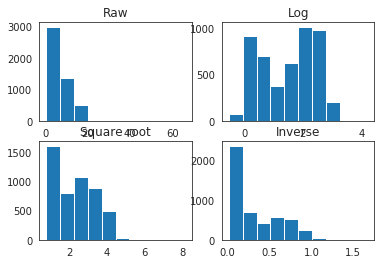

In [13]:
# Making a four-panel plot.
fig = plt.figure()

fig.add_subplot(221)
plt.hist(df['residual sugar'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['residual sugar'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['residual sugar'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['residual sugar'].dropna())
plt.title('Inverse')
plt.show()

# None of these transformations look particularly great, actually. But let's
# make a feature from the log one.

#
features['log_sugar'] = np.log(df['residual sugar'])

3  4  5  6  7  8  9  Normalized_Vars  log_sugar
0  0  0  0  1  0  0  0         0.323588   3.030134
1  0  0  0  1  0  0  0        -0.359225   0.470004
2  0  0  0  1  0  0  0         0.150298   1.931521
3  0  0  0  1  0  0  0         0.324331   2.140066
4  0  0  0  1  0  0  0         0.324331   2.140066

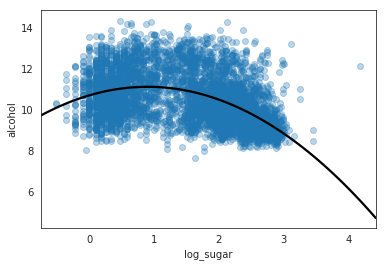

In [21]:
sns.regplot(
    features['log_sugar'],
    y=df['alcohol'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()


In [138]:


df_corr = pd.DataFrame(corrmat['quality'])
df_corr = df_corr.reset_index(drop=False)

corr_varibles = df_corr[(df_corr.quality != 1) & (df_corr.quality >= 0.1)| 
                    (df_corr.quality != -1) & (df_corr.quality <= -0.19)] 
corr_varibles.sort_values('quality')


index   quality
7            density -0.307123
4          chlorides -0.209934
1   volatile_acidity -0.194723
13      sulfur_ratio  0.197214
14   density_alcohol  0.434966
10           alcohol  0.435575